In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from itertools import cycle
import warnings
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from mlxtend.classifier import StackingCVClassifier
from collections import Counter
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import statsmodels.api as sm
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import label_binarize

In [2]:
dftrain = pd.read_csv("train_setgeo.csv")

In [3]:
dftest = pd.read_csv("test_setgeo.csv")

In [4]:
warnings.filterwarnings("ignore")

In [5]:
dftrain.duplicated().sum()

0

In [6]:
dftrain.columns

Index(['Gender', 'Bike', 'Skate', 'Hsize', 'Time', 'Convenience', 'Cost',
       'Safety', 'Environment', 'Health', 'Weather', 'Parking',
       'Geodesic_distance', 'Age_20 και κάτω', 'Age_21 - 30', 'Age_31 -40',
       'Age_41 - 50', 'Age_51 και ανω', 'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 και ανω', 'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_Other', 'Mode'],
      dtype='object')

We will run Variance Inflator frequency to reduce multicollinearity

In [12]:
drops = ['Mode']
X_train = dftrain.drop(drops, axis=1)
y_train = dftrain["Mode"]

In [13]:
df_with_constant = add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]
print(vif_data)

                     Variable       VIF
0                       const  0.000000
1                      Gender  1.250529
2                        Bike  1.223014
3                       Skate  1.253630
4                       Hsize  1.138906
5                        Time  1.636829
6                 Convenience  1.651492
7                        Cost  1.254043
8                      Safety  2.238722
9                 Environment  1.658242
10                     Health  1.902415
11                    Weather  1.644778
12                    Parking  1.527702
13          Geodesic_distance  1.467106
14            Age_20 και κάτω       inf
15                Age_21 - 30       inf
16                 Age_31 -40       inf
17                Age_41 - 50       inf
18             Age_51 και ανω       inf
19             Income_0 - 500       inf
20         Income_1000 - 1500       inf
21        Income_1500 και ανω       inf
22          Income_500 - 1000       inf
23  Depart_time_06.00 - 09.00       inf


In [14]:
drops = ['Mode', 'Depart_time_06.00 - 09.00', 'Income_500 - 1000', 'Age_21 - 30', 'Skate']
X_train = dftrain.drop(drops, axis=1)
y_train = dftrain["Mode"]

In [15]:
df_with_constant = add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]
print(vif_data)

                     Variable        VIF
0                       const  61.619406
1                      Gender   1.247647
2                        Bike   1.187826
3                       Hsize   1.136875
4                        Time   1.634990
5                 Convenience   1.650817
6                        Cost   1.243376
7                      Safety   2.216005
8                 Environment   1.642796
9                      Health   1.895120
10                    Weather   1.636456
11                    Parking   1.524796
12          Geodesic_distance   1.457671
13            Age_20 και κάτω   1.471020
14                 Age_31 -40   1.557844
15                Age_41 - 50   1.432888
16             Age_51 και ανω   1.289397
17             Income_0 - 500   1.617016
18         Income_1000 - 1500   1.550132
19        Income_1500 και ανω   1.571234
20  Depart_time_09.00 - 12.00   1.337958
21  Depart_time_12.00 - 15.00   1.356104
22          Depart_time_Other   1.307337


Those will be the final features

In [7]:
drops = ['Mode', 'Depart_time_06.00 - 09.00', 'Income_500 - 1000', 'Age_21 - 30', 'Skate']
X_train = dftrain.drop(drops, axis=1)
y_train = dftrain["Mode"]

In [8]:
drops = ['Mode', 'Depart_time_06.00 - 09.00', 'Income_500 - 1000', 'Age_21 - 30', 'Skate']
X_test = dftest.drop(drops, axis=1)
y_test = dftest["Mode"]

In [9]:
X_train.columns

Index(['Gender', 'Bike', 'Hsize', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Geodesic_distance',
       'Age_20 και κάτω', 'Age_31 -40', 'Age_41 - 50', 'Age_51 και ανω',
       'Income_0 - 500', 'Income_1000 - 1500', 'Income_1500 και ανω',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_Other'],
      dtype='object')

In [10]:
undersampler = RandomUnderSampler(sampling_strategy={0: 73}, random_state=123)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [11]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    73
1    73
2    72
Name: count, dtype: int64

Class counts in y_test:
Mode
0    55
2    49
1    49
Name: count, dtype: int64


In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((218, 22), (218,), (153, 22), (153,))

# Decision tree

In [26]:
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(X_train, y_train)
max_depth = dt_model.tree_.max_depth
max_depth

8

In [27]:
y_pred_test = dt_model.predict(X_train)
Tree_Report = classification_report(y_train, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00        72

    accuracy                           1.00       218
   macro avg       1.00      1.00      1.00       218
weighted avg       1.00      1.00      1.00       218



In [28]:
y_pred_test = dt_model.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80        55
           1       0.78      0.71      0.74        49
           2       0.77      0.88      0.82        49

    accuracy                           0.79       153
   macro avg       0.79      0.79      0.79       153
weighted avg       0.79      0.79      0.79       153



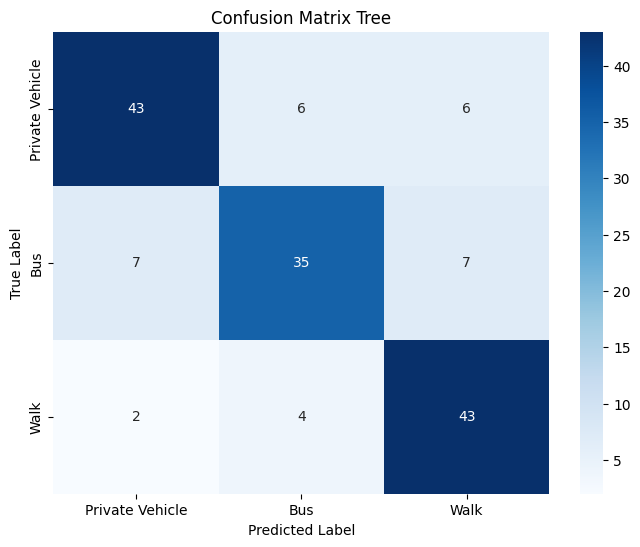

In [29]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_dt = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [30]:
param_grid = {
    'max_depth': list(range(2, 9))
}

grid_search_dt = GridSearchCV(dt_model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8]},
             scoring='accuracy')

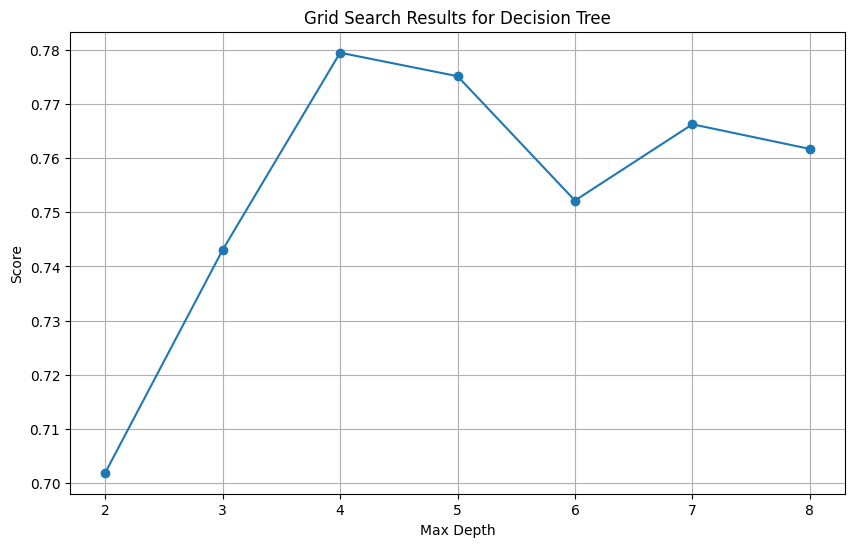

In [31]:
results = grid_search_dt.cv_results_
max_depth_values = results['param_max_depth'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [35]:
dt_model = DecisionTreeClassifier(random_state=1, max_depth=4)
dt_model.fit(X_train, y_train)
y_pred_test = dt_model.predict(X_train)
Tree_Report = classification_report(y_train, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91        73
           1       0.84      0.90      0.87        73
           2       0.98      0.85      0.91        72

    accuracy                           0.89       218
   macro avg       0.90      0.89      0.90       218
weighted avg       0.90      0.89      0.90       218



In [36]:
y_pred_test = dt_model.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        55
           1       0.73      0.78      0.75        49
           2       0.87      0.82      0.84        49

    accuracy                           0.82       153
   macro avg       0.82      0.82      0.82       153
weighted avg       0.83      0.82      0.82       153



In [37]:
dt_model = DecisionTreeClassifier(random_state=1)
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [1, 2, 3, 4,  5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
}
grid_search_dt = GridSearchCV(dt_model, param_grid, cv=10, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [38]:
bestp = grid_search_dt.best_params_
bestp

{'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 2}

In [50]:
tree=grid_search_dt.best_estimator_
y_pred_log = tree.predict(X_train)
Log_Report = classification_report(y_train, y_pred_log)
print('Tree_Report:', Log_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        73
           1       0.82      0.86      0.84        73
           2       0.94      0.83      0.88        72

    accuracy                           0.87       218
   macro avg       0.87      0.87      0.87       218
weighted avg       0.87      0.87      0.87       218



In [51]:
y_pred_tree = tree.predict(X_test)
tree_Report = classification_report(y_test, y_pred_tree)
print('Tree_Report:', tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        55
           1       0.77      0.82      0.79        49
           2       0.84      0.84      0.84        49

    accuracy                           0.84       153
   macro avg       0.84      0.84      0.84       153
weighted avg       0.84      0.84      0.84       153



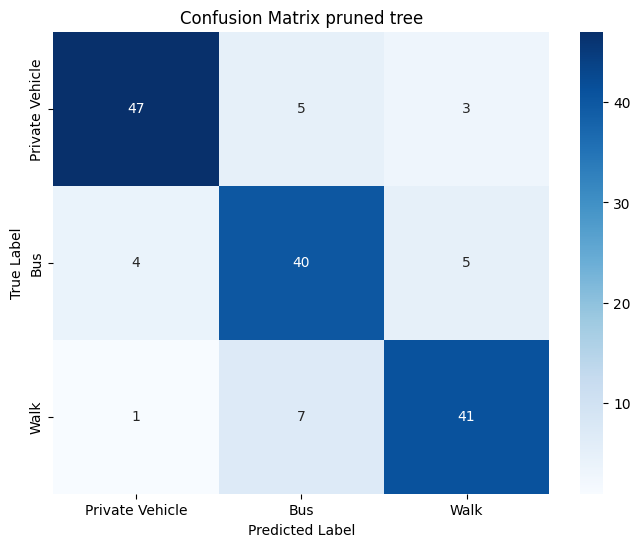

In [52]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_dt = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix pruned tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

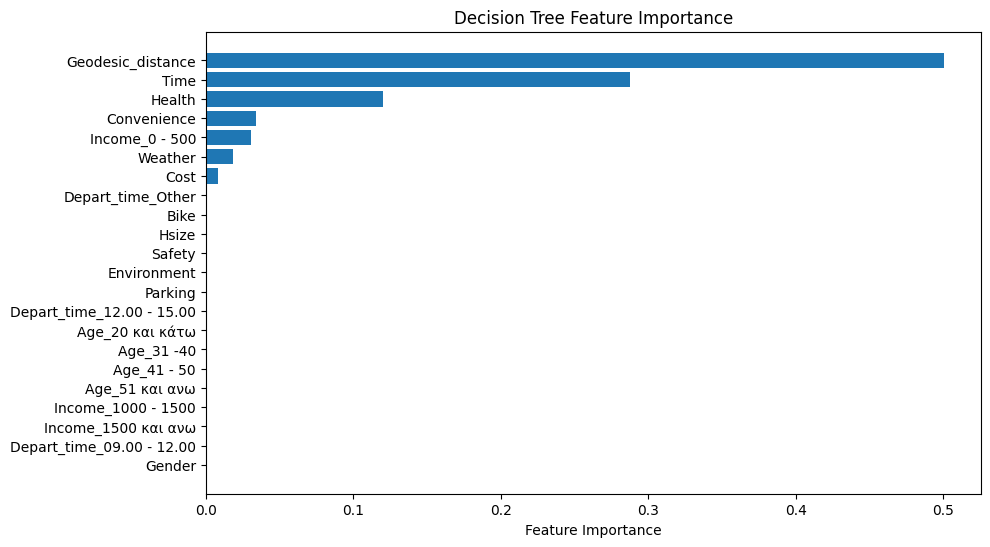

In [53]:
feature_importances = tree.feature_importances_

feature_names = ['Gender', 'Bike', 'Hsize', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Geodesic_distance',
       'Age_20 και κάτω', 'Age_31 -40', 'Age_41 - 50', 'Age_51 και ανω',
       'Income_0 - 500', 'Income_1000 - 1500', 'Income_1500 και ανω',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_Other']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

In [13]:
features = ['Gender', 'Bike', 'Hsize', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Geodesic_distance',
       'Age_20 και κάτω', 'Age_31 -40', 'Age_41 - 50', 'Age_51 και ανω',
       'Income_0 - 500', 'Income_1000 - 1500', 'Income_1500 και ανω',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_Other']

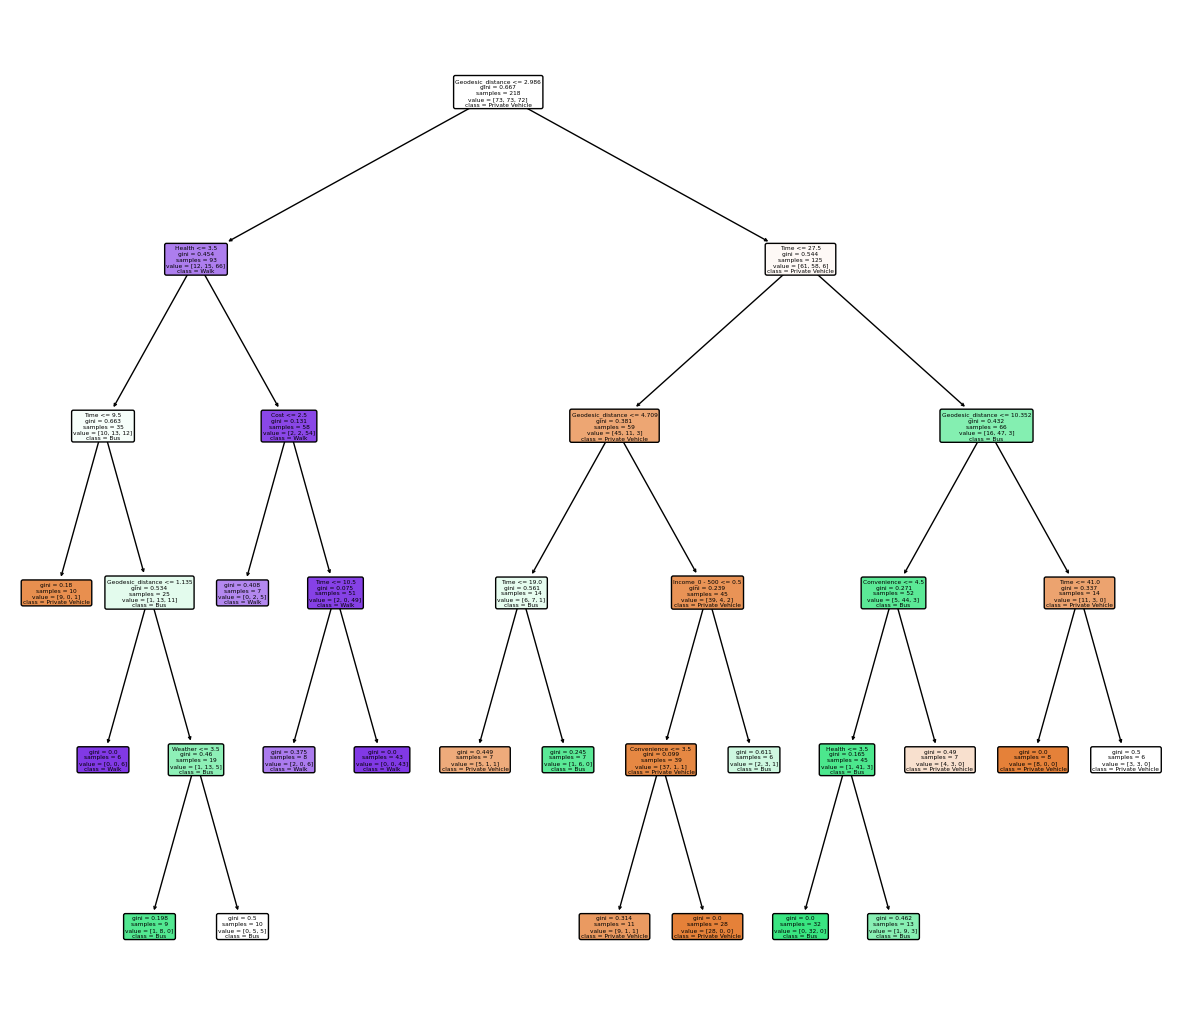

In [55]:
plt.figure(figsize=(15, 13))
plot_tree(tree, filled=True, feature_names=features, class_names=class_labels, rounded=True)
plt.show()

In [14]:
class_labels_mapping = {
    0: 'private vehicle',
    1: 'bus',
    2: 'walk'
}

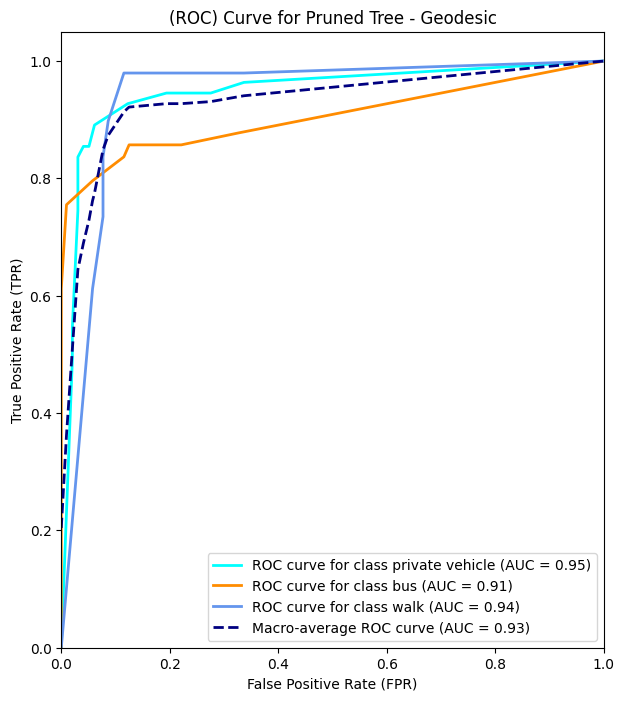

In [57]:
class_probabilities_tree = tree.predict_proba(X_test)
y_pred_prob_tree = np.argmax(class_probabilities_tree, axis=1)
y_test_bin_tree = label_binarize(y_test, classes=tree.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(tree.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_tree[:, i], class_probabilities_tree[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(tree.classes_))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(tree.classes_)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(tree.classes_)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(tree.classes_, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("(ROC) Curve for Pruned Tree - Geodesic")

plt.show()

In [58]:
roc_auc["macro"]

0.9310873528803557

# Random Forest

In [59]:
X_train.shape, X_test.shape

((218, 22), (153, 22))

In [63]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf_basic = rf_model.predict(X_train)
reportrfbasic = classification_report(y_train, y_pred_rf_basic)
print(reportrfbasic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00        72

    accuracy                           1.00       218
   macro avg       1.00      1.00      1.00       218
weighted avg       1.00      1.00      1.00       218



In [64]:
y_pred_rf_basic = rf_model.predict(X_test)
reportrfbasic = classification_report(y_test, y_pred_rf_basic)
confm = confusion_matrix(y_test, y_pred_rf_basic)
print(reportrfbasic)
print(confm)

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        55
           1       0.86      0.90      0.88        49
           2       0.90      0.90      0.90        49

    accuracy                           0.90       153
   macro avg       0.90      0.90      0.90       153
weighted avg       0.90      0.90      0.90       153

[[49  4  2]
 [ 2 44  3]
 [ 2  3 44]]


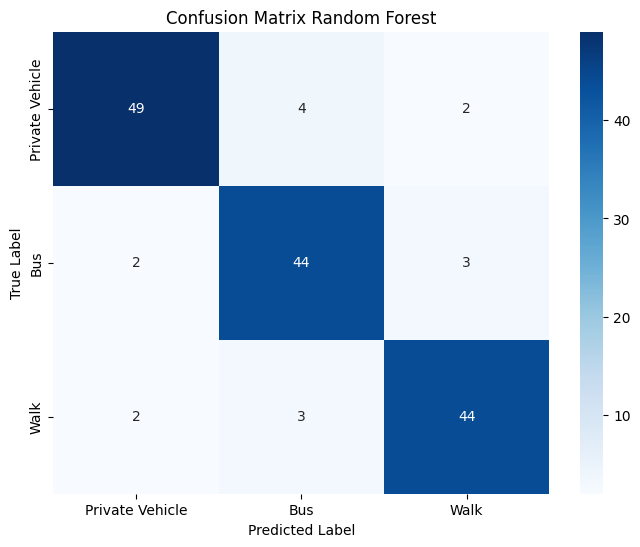

In [65]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_bag = confusion_matrix(y_test, y_pred_rf_basic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bag, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [66]:
param_grid = {
    'max_features': range(2, 23)
}

rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_features': 11}


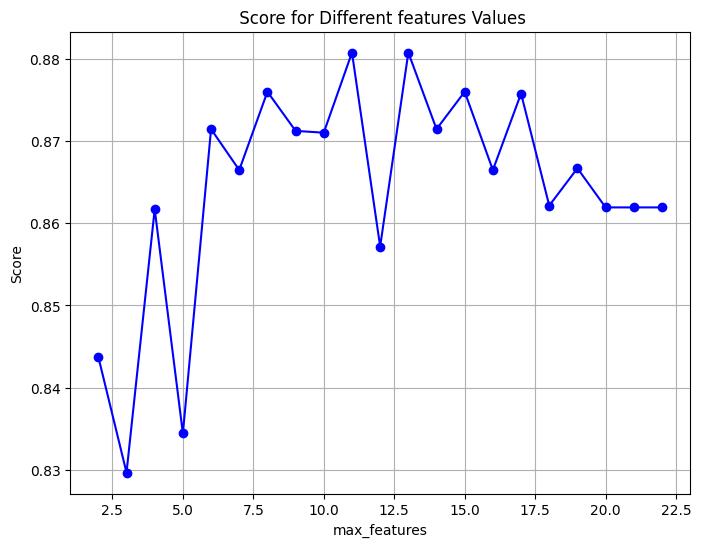

In [67]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['max_features']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for Different features Values')
plt.xlabel('max_features')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [68]:
param_grid = {
    'n_estimators': list(range(50, 301))}
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'n_estimators': 81}


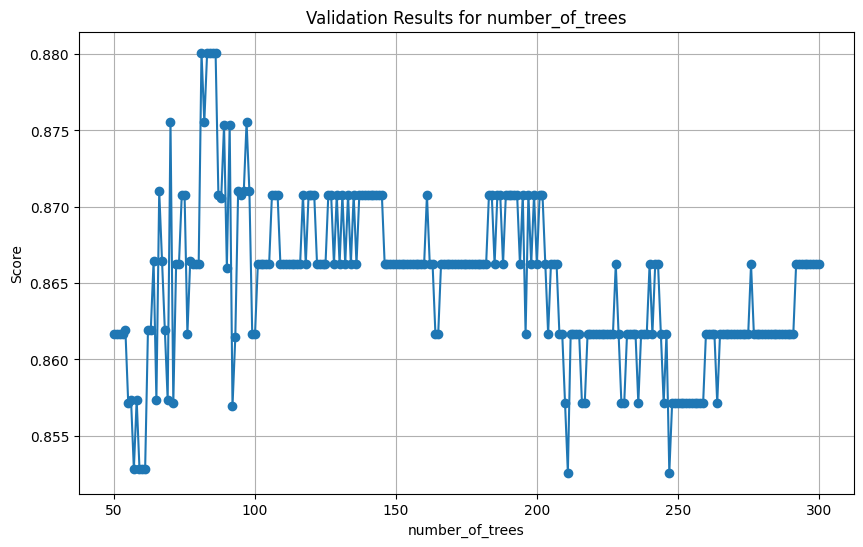

In [69]:
number_of_trees = grid_search.cv_results_['param_n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

{'max_depth': 7}


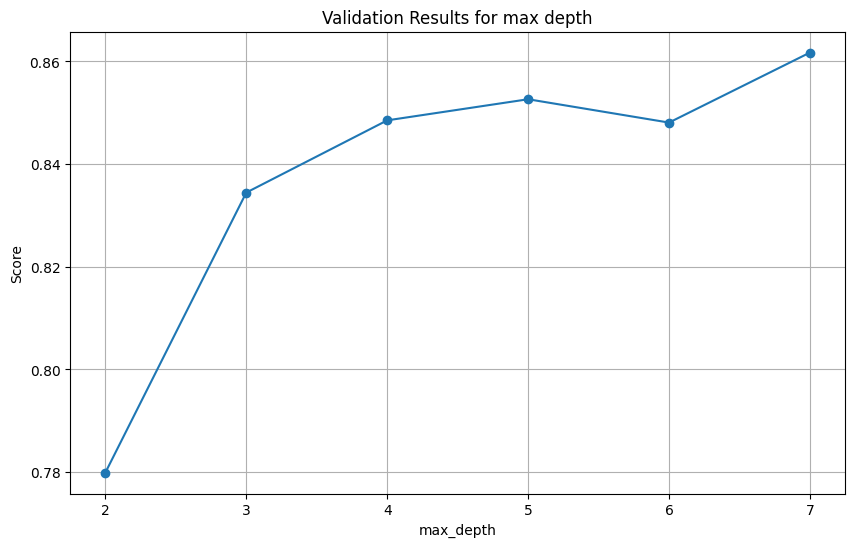

In [70]:
param_grid = {
    'max_depth': list(range(2, 8))}
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)
number_of_trees = grid_search.cv_results_['param_max_depth']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Validation Results for max depth')
plt.grid(True)
plt.show()

In [71]:
param_grid = {
    'n_estimators': list(range(75, 91)),
    'max_features': [8, 11, 13],
    'max_depth': [7]}
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_depth': 7, 'max_features': 11, 'n_estimators': 83}


In [73]:
random_forest = grid_search.best_estimator_
y_pred_rf_basic = random_forest.predict(X_train)
reportrfbasic = classification_report(y_train, y_pred_rf_basic)
print(reportrfbasic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00        72

    accuracy                           1.00       218
   macro avg       1.00      1.00      1.00       218
weighted avg       1.00      1.00      1.00       218



In [74]:
random_forest = grid_search.best_estimator_
y_pred_rf_basic = random_forest.predict(X_test)
reportrfbasic = classification_report(y_test, y_pred_rf_basic)
print(reportrfbasic)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        55
           1       0.93      0.86      0.89        49
           2       0.87      0.92      0.89        49

    accuracy                           0.91       153
   macro avg       0.91      0.91      0.91       153
weighted avg       0.91      0.91      0.91       153



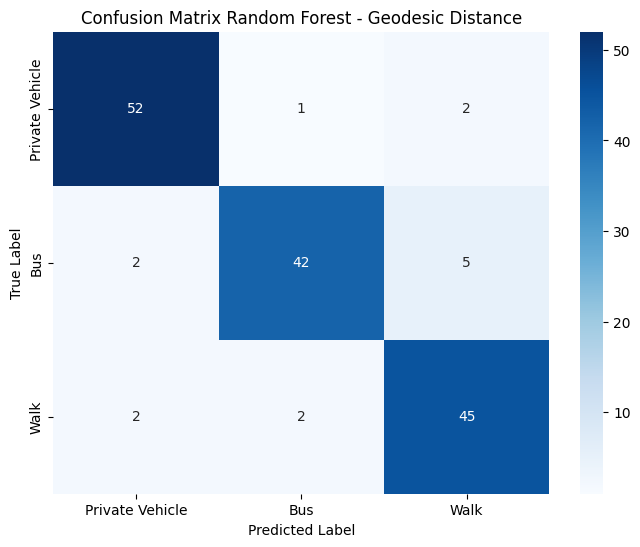

In [75]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_bag = confusion_matrix(y_test, y_pred_rf_basic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bag, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Random Forest - Geodesic Distance')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

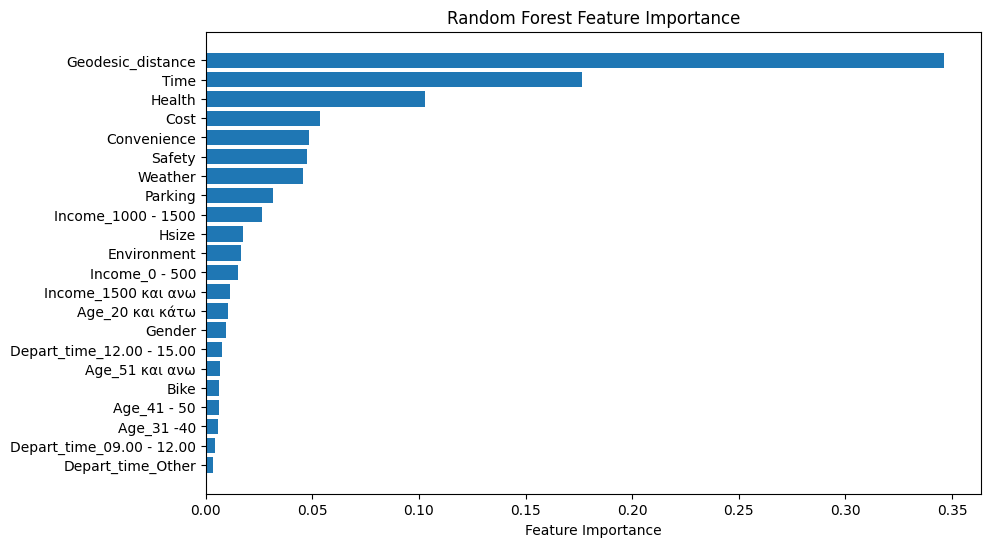

In [76]:
feature_importances = random_forest.feature_importances_

feature_names = ['Gender', 'Bike', 'Hsize', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Geodesic_distance',
       'Age_20 και κάτω', 'Age_31 -40', 'Age_41 - 50', 'Age_51 και ανω',
       'Income_0 - 500', 'Income_1000 - 1500', 'Income_1500 και ανω',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_Other']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

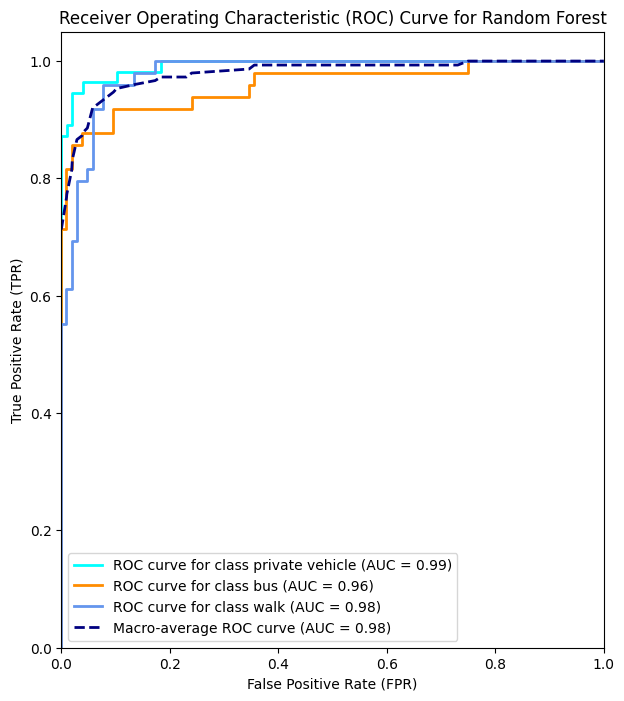

In [77]:
class_probabilities_rf = random_forest.predict_proba(X_test)
y_pred_prob_rf = np.argmax(class_probabilities_rf, axis=1)
y_test_bin_rf = label_binarize(y_test, classes=random_forest.classes_)
# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(random_forest.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_rf[:, i], class_probabilities_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(random_forest.classes_))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(random_forest.classes_)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(random_forest.classes_)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve
_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(random_forest.classes_, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curve for Random Forest")

plt.show()

In [78]:
roc_auc['macro']

0.9786612075970677

# XGBoost

In [79]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

In [80]:
xgb_classifier.fit(X_train, y_train)
y_pred_test = xgb_classifier.predict(X_test)
xgbreport = classification_report(y_test, y_pred_test)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        55
           1       0.89      0.86      0.88        49
           2       0.86      0.88      0.87        49

    accuracy                           0.88       153
   macro avg       0.88      0.88      0.88       153
weighted avg       0.88      0.88      0.88       153



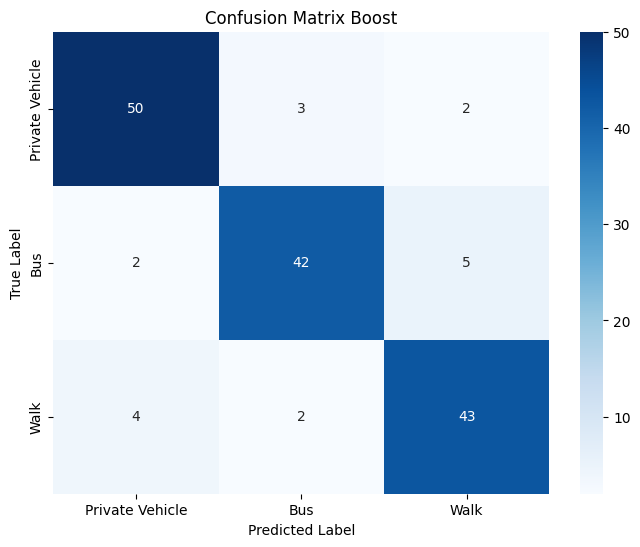

In [81]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_ada = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Boost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

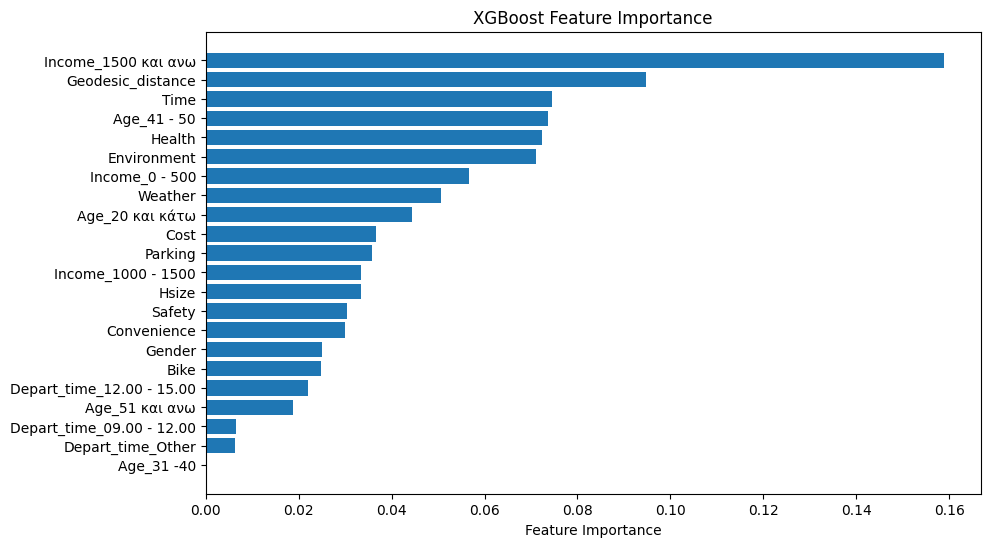

In [82]:
feature_importances = xgb_classifier.feature_importances_

feature_names = ['Gender', 'Bike', 'Hsize', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Geodesic_distance',
       'Age_20 και κάτω', 'Age_31 -40', 'Age_41 - 50', 'Age_51 και ανω',
       'Income_0 - 500', 'Income_1000 - 1500', 'Income_1500 και ανω',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_Other']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()

In [83]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

In [84]:
param_grid = {
    'n_estimators': list(range(50, 301)),
}

In [85]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

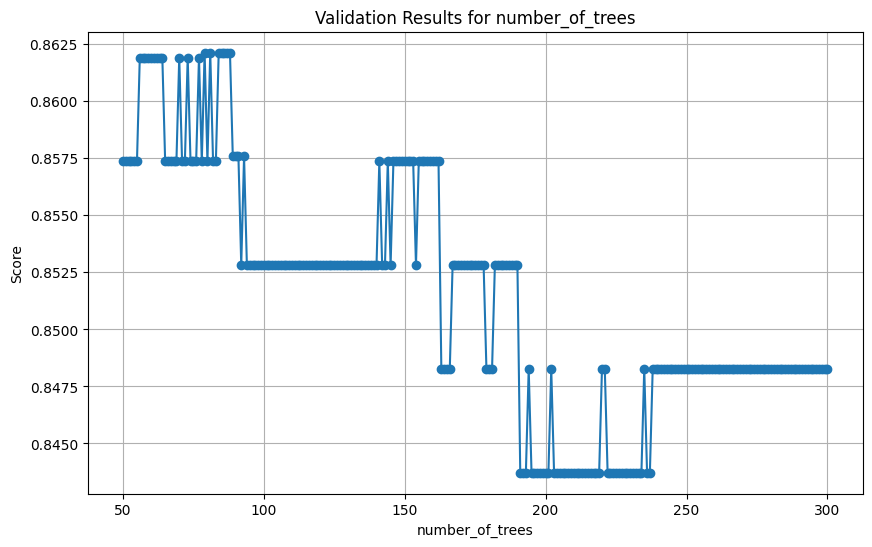

In [86]:
number_of_trees = grid_search.cv_results_['param_n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [87]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

In [88]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

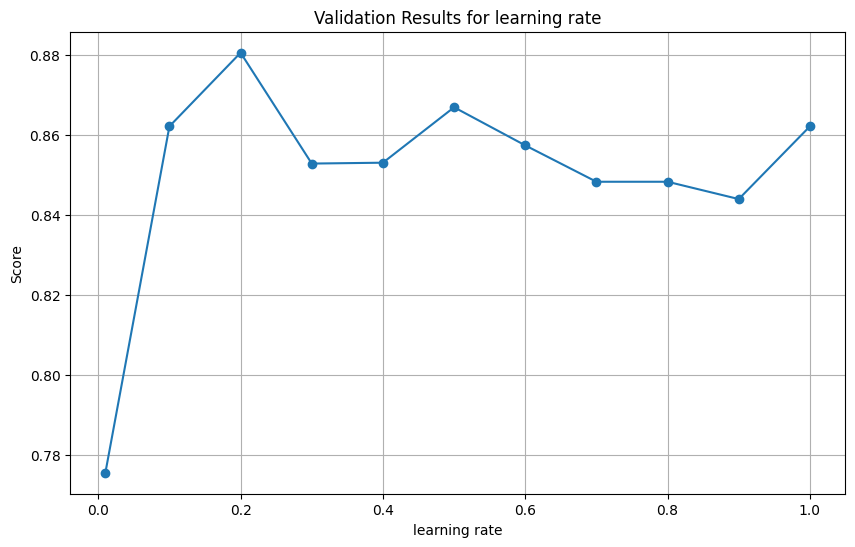

In [89]:
number_of_trees = grid_search.cv_results_['param_learning_rate']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('learning rate')
plt.ylabel('Score')
plt.title('Validation Results for learning rate')
plt.grid(True)
plt.show()

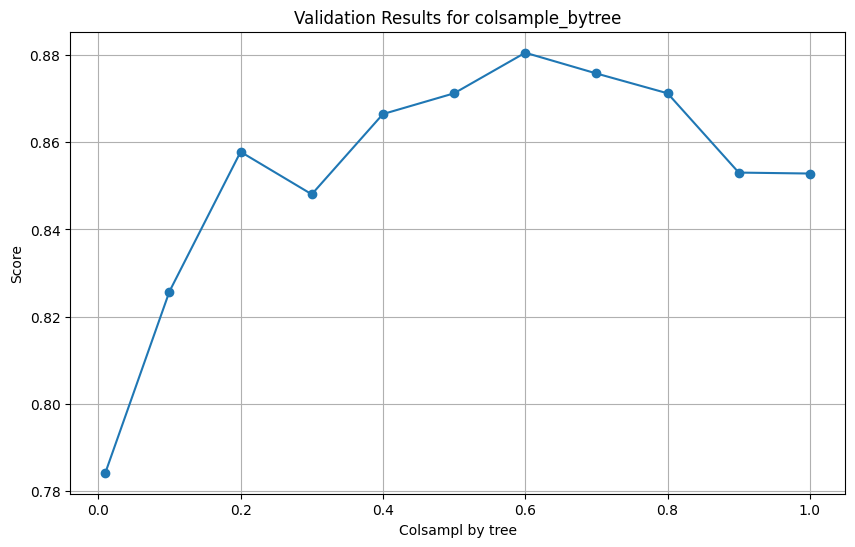

In [90]:
param_grid = {
    'colsample_bytree': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
number_of_trees = grid_search.cv_results_['param_colsample_bytree']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('Colsampl by tree')
plt.ylabel('Score')
plt.title('Validation Results for colsample_bytree')
plt.grid(True)
plt.show()

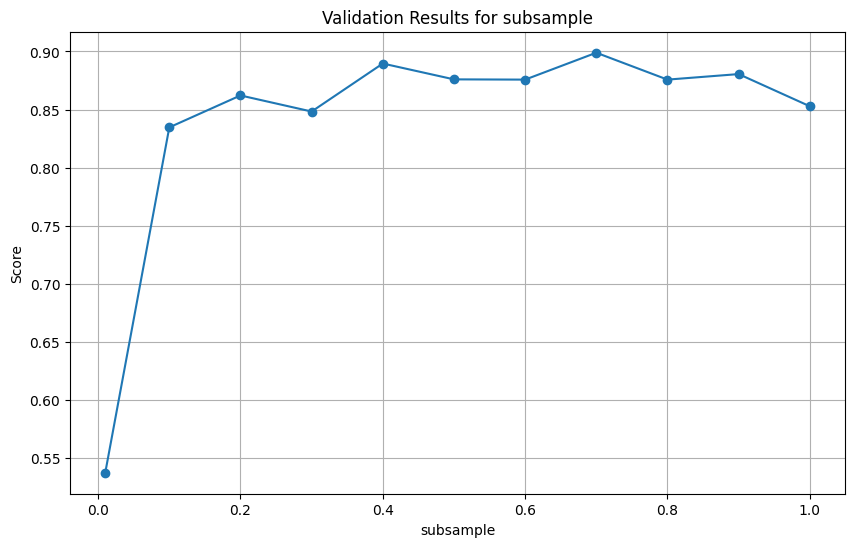

In [91]:
param_grid = {
    'subsample': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
number_of_trees = grid_search.cv_results_['param_subsample']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('subsample')
plt.ylabel('Score')
plt.title('Validation Results for subsample')
plt.grid(True)
plt.show()

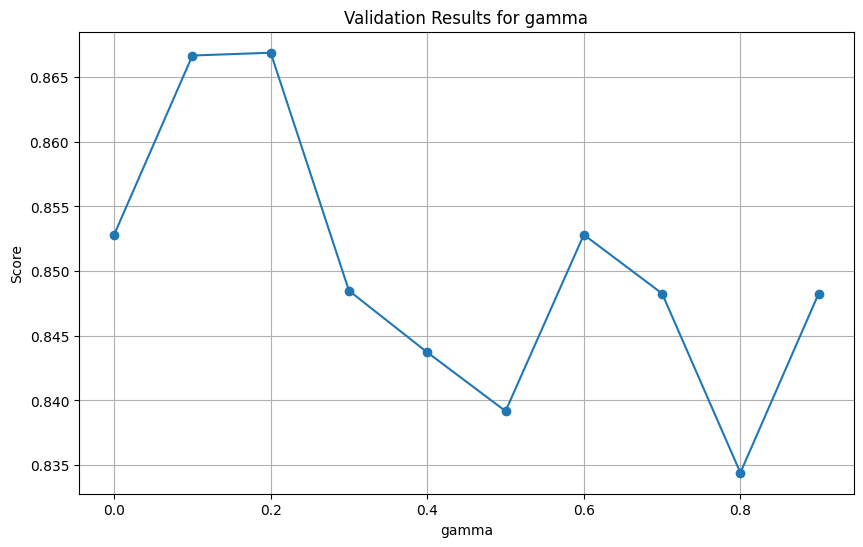

In [92]:
param_grid = {
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
number_of_trees = grid_search.cv_results_['param_gamma']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('gamma')
plt.ylabel('Score')
plt.title('Validation Results for gamma')
plt.grid(True)
plt.show()

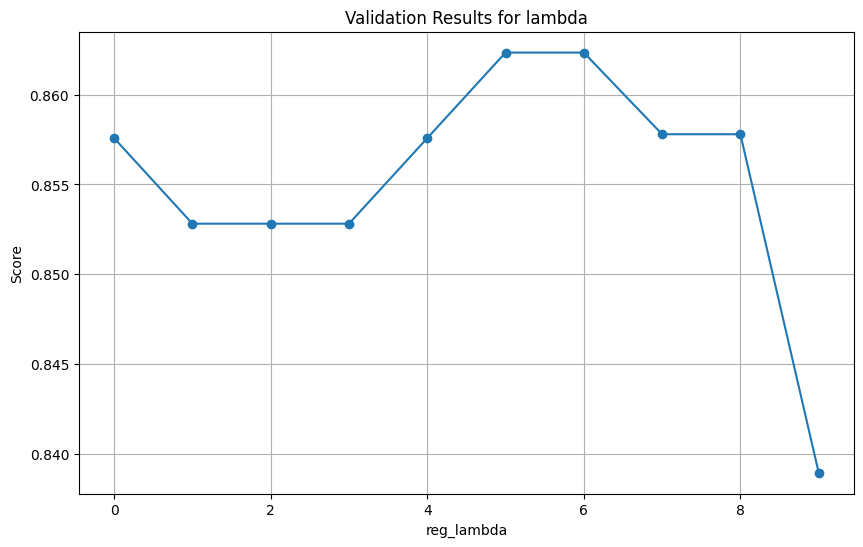

In [93]:
param_grid = {
    'reg_lambda': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
number_of_trees = grid_search.cv_results_['param_reg_lambda']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('reg_lambda')
plt.ylabel('Score')
plt.title('Validation Results for lambda')
plt.grid(True)
plt.show()

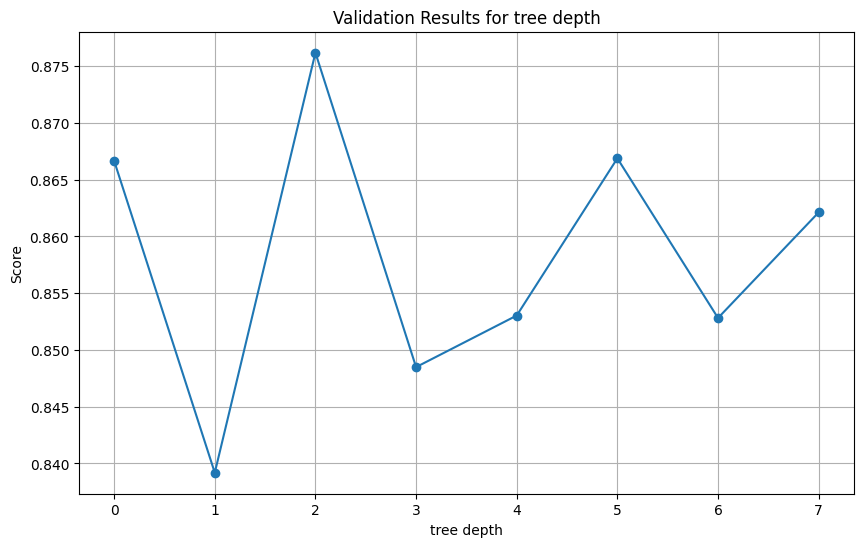

In [94]:
param_grid = {
    'max_depth': [0, 1, 2, 3, 4, 5, 6, 7]}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
number_of_trees = grid_search.cv_results_['param_max_depth']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('tree depth')
plt.ylabel('Score')
plt.title('Validation Results for tree depth')
plt.grid(True)
plt.show()

In [95]:
param_grid = {
    'n_estimators' : list(range(50, 91)),
    'gamma' : [0],
    'max_depth' : [2],
    'reg_lambda' : [6],
    'subsample': [0.7],
    'colsample_bytree' : [0.6],
    'learning_rate': [0.2]}

In [96]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 75, 'reg_lambda': 6, 'subsample': 0.7}


In [97]:
best_model = grid_search.best_estimator_

In [99]:
y_pred_test = best_model.predict(X_train)
xgbreport = classification_report(y_train, y_pred_test)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        73
           1       0.99      0.99      0.99        73
           2       0.97      0.96      0.97        72

    accuracy                           0.97       218
   macro avg       0.97      0.97      0.97       218
weighted avg       0.97      0.97      0.97       218



In [100]:
y_pred_test = best_model.predict(X_test)
xgbreport = classification_report(y_test, y_pred_test)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        55
           1       0.90      0.90      0.90        49
           2       0.88      0.88      0.88        49

    accuracy                           0.90       153
   macro avg       0.89      0.89      0.89       153
weighted avg       0.90      0.90      0.90       153



In [101]:
class_labels = ["Private Vehicle", "Bus", "Walk"]

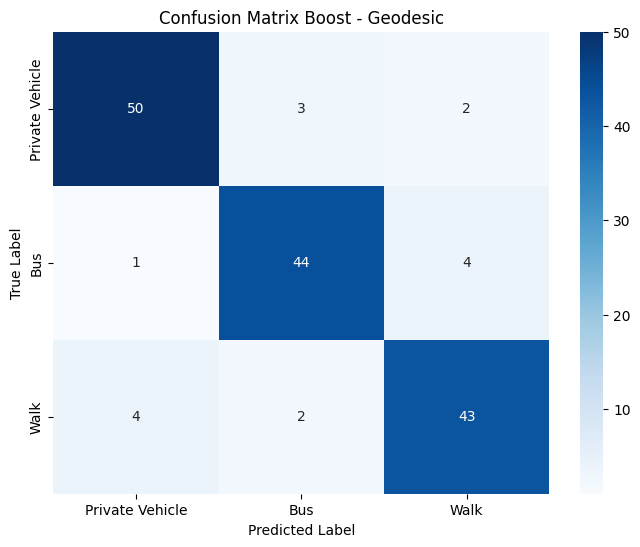

In [102]:
conf_matrix_ada = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Boost - Geodesic')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

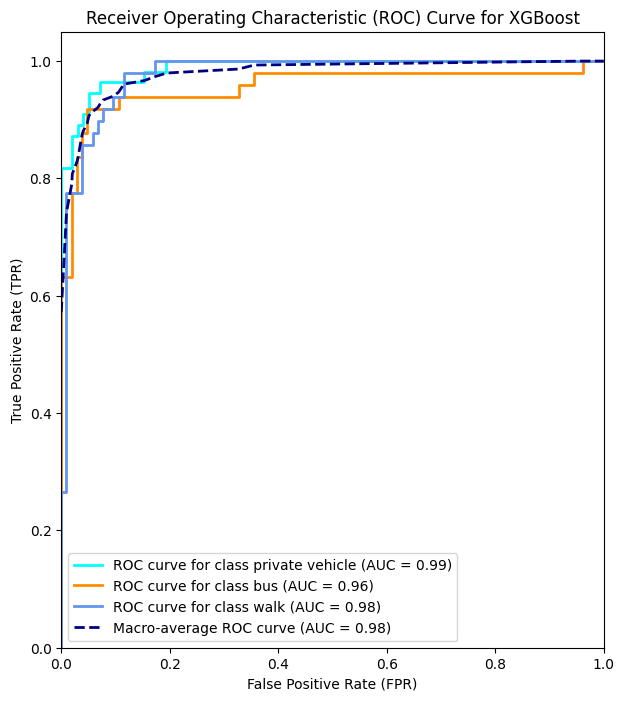

In [103]:
class_probabilities_xgb = best_model.predict_proba(X_test)
y_pred_prob_xgb = np.argmax(class_probabilities_xgb, axis=1)
y_test_bin_xgb = label_binarize(y_test, classes=best_model.classes_)
# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(best_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(best_model.classes_))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(best_model.classes_)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(best_model.classes_)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve
_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(best_model.classes_, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curve for XGBoost")

plt.show()

In [104]:
roc_auc['macro']

0.9784883847930498

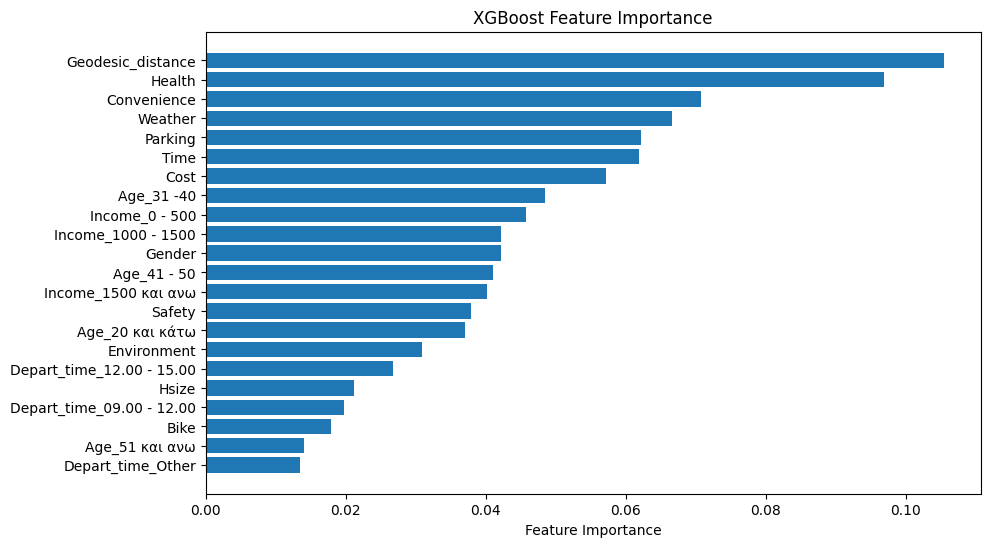

In [105]:
feature_importances = best_model.feature_importances_

feature_names = ['Gender', 'Bike', 'Hsize', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Geodesic_distance',
       'Age_20 και κάτω', 'Age_31 -40', 'Age_41 - 50', 'Age_51 και ανω',
       'Income_0 - 500', 'Income_1000 - 1500', 'Income_1500 και ανω',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_Other']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()

# Model Stack

In [106]:
base_classifier1 = RandomForestClassifier(random_state=42,n_jobs=-1)
base_classifier2 = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
base_classifier3 = DecisionTreeClassifier(random_state=42)
meta_classifier = LogisticRegression(multi_class='ovr')
stacking_classifier = StackingCVClassifier(
    classifiers=[base_classifier1, base_classifier2, base_classifier3],
    meta_classifier=meta_classifier,
    cv=10,
    random_state=1
)
stacking_classifier.fit(X_train, y_train)
y_pred = stacking_classifier.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        55
           1       0.87      0.80      0.83        49
           2       0.82      0.86      0.84        49

    accuracy                           0.87       153
   macro avg       0.87      0.87      0.87       153
weighted avg       0.87      0.87      0.87       153



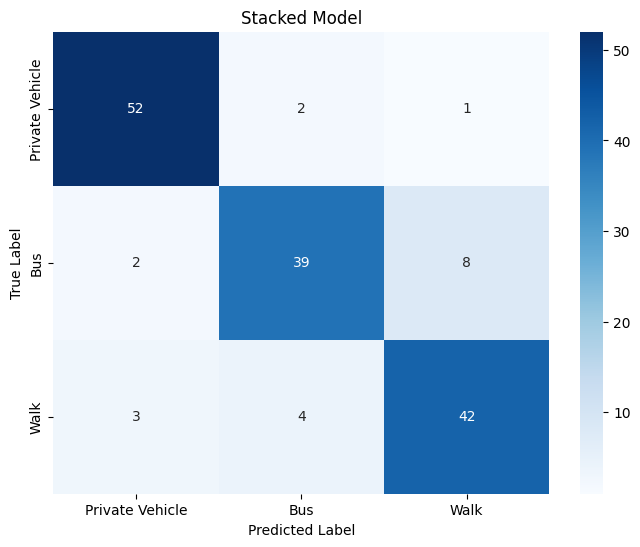

In [107]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_ada = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Stacked Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [17]:
label_binarizer = LabelBinarizer()
label_binarizer.fit(y_train)
y_test_bin = label_binarizer.transform(y_test)
classes = label_binarizer.classes_

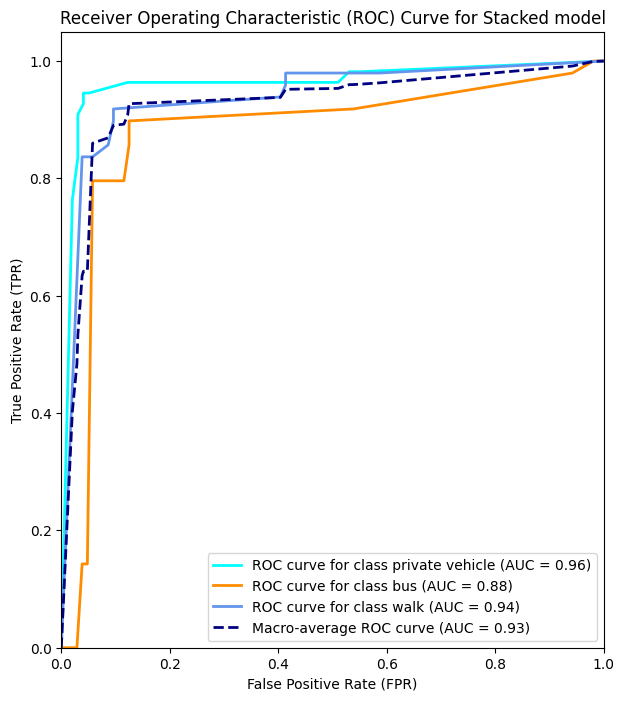

In [109]:
class_probabilities_st = stacking_classifier.predict_proba(X_test)
y_pred_prob_st = np.argmax(class_probabilities_st, axis=1)
# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], class_probabilities_st[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(classes)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(classes, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curve for Stacked model")

plt.show()

In [110]:
roc_auc["macro"]

0.9256928688415569

In [15]:
base_classifier1 = RandomForestClassifier(random_state=42,n_jobs=-1, max_depth=7, max_features=11, n_estimators= 99)
base_classifier2 = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42,
                                    colsample_bytree=0.6, learning_rate= 0.2, max_depth= 2, n_estimators=75, reg_lambda= 6, subsample=0.7)
base_classifier3 = DecisionTreeClassifier(random_state=42, max_depth= 5)
meta_classifier = LogisticRegression(multi_class='ovr')
stacking_classifier = StackingCVClassifier(
    classifiers=[base_classifier1, base_classifier2, base_classifier3],
    meta_classifier=meta_classifier,
    cv=10,
    random_state=1
)
stacking_classifier.fit(X_train, y_train)
y_pred = stacking_classifier.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        55
           1       0.93      0.80      0.86        49
           2       0.81      0.90      0.85        49

    accuracy                           0.88       153
   macro avg       0.89      0.88      0.88       153
weighted avg       0.89      0.88      0.88       153



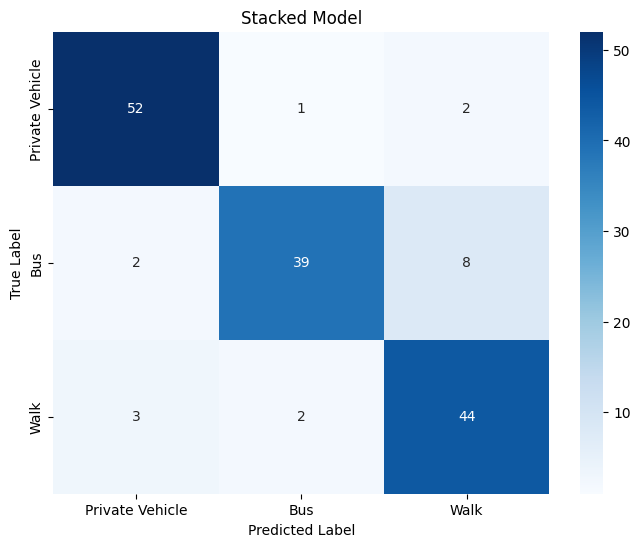

In [16]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_ada = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Stacked Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

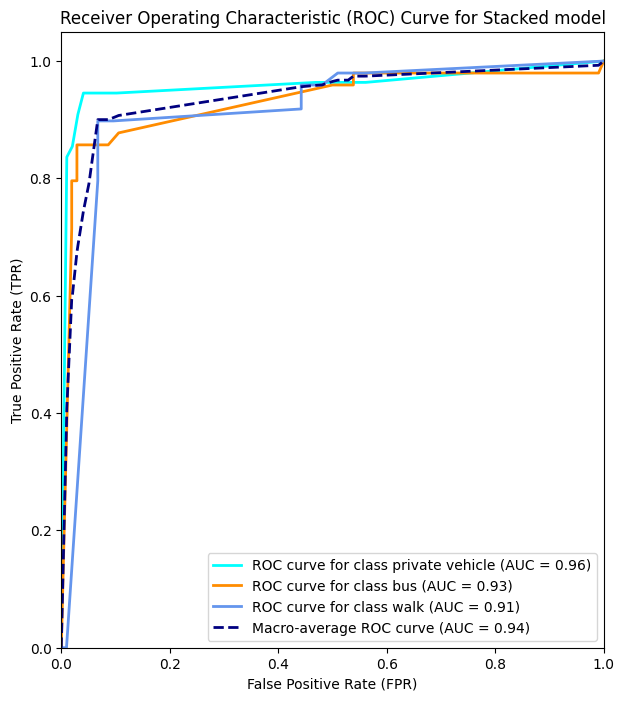

In [18]:
class_probabilities_st = stacking_classifier.predict_proba(X_test)
y_pred_prob_st = np.argmax(class_probabilities_st, axis=1)
# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], class_probabilities_st[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(classes)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(classes, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curve for Stacked model")

plt.show()

In [19]:
roc_auc["macro"]

0.9374626224116019